In [2]:
using Plots
gr(size=(600,400))
nothing

In [28]:
"""
    pi_atan(n)

π ≈ 4 (1 - 1/3 + 1/5 - 1/7 + … + (-1)ⁿ⁻¹ / (2n - 1) )
Termo: 1    2     3     4                n

aₙ   = (-1)ⁿ⁻¹ / (2n - 1)
aₙ₊₁ = (-1)ⁿ / (2n + 1)

σₙ = (-1)ⁿ⁻¹
σₙ₊₁ = -σₙ

aₙ = σₙ / (2n - 1)
"""
function pi_atan(n)
    s = 0.0
    σ = 1
    for k = 1:n
        s += σ / (2k - 1)
        σ = -σ
    end
    return 4s
end

function pi_atan_todos(n)
    PI = zeros(n)
    s = 0.0
    σ = 1
    for k = 1:n
        s += σ / (2k - 1)
        PI[k] = 4s
        σ = -σ
    end
    return 1:n, PI
end

pi_atan_todos (generic function with 1 method)

In [29]:
pi_atan(1000)

3.140592653839794

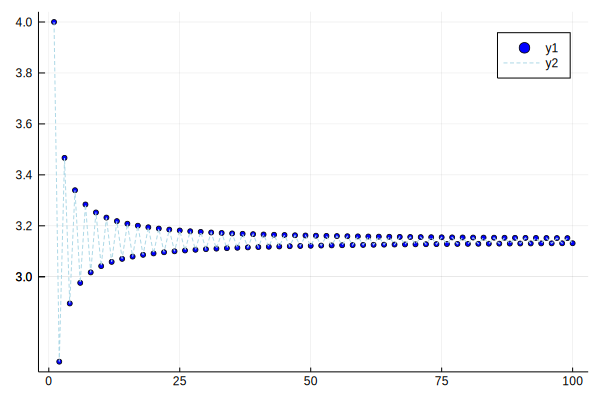

In [30]:
n  = 100
N, PI = pi_atan_todos(n)
scatter(N, PI, c=:blue, ms=3)
plot!(N, PI, c=:lightblue, l=:dash)

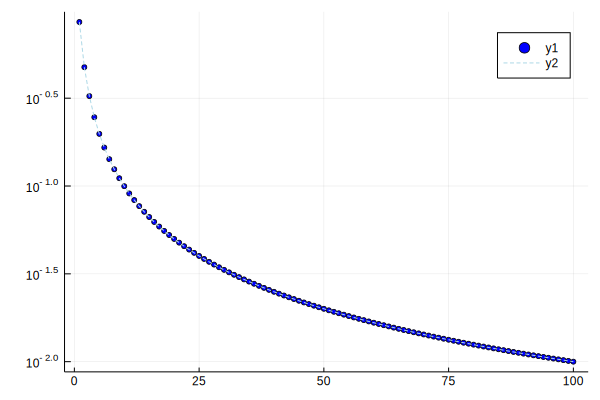

In [33]:
# Erro absoluto em log
n     = 100
N, PI = pi_atan_todos(n)
E     = abs.(PI .- pi)
scatter(N, E, c=:blue, ms=3, yaxis=:log)
plot!(N, E, c=:lightblue, l=:dash)

$$\pi = \sqrt{12}\sum_{k = 0}^{\infty} \frac{(-1)^k}{3^k(2k + 1)} $$

In [82]:
"""
    pi_ml(n)

aₙ   = (-1)ⁿ / 3ⁿ / (2n + 1)

σₙ = (-1)ⁿ
σₙ₊₁ = -σₙ

tₙ = (1/3)ⁿ
tₙ₊₁ = tₙ / 3

aₙ = σₙ × tₙ / (2n + 1)
"""
function pi_ml(n)
    s = big"0"
    σ = 1
    t = big"1"
    for k = 0:n
        s += σ * t / (2k + 1)
        σ = -σ
        t /= 3
    end
    return sqrt(big"12") * s
end

function pi_ml()
    s = big"0"
    σ = 1
    t = big"1"
    k = 0
    T = σ * t / (2k + 1)
    while s + T != s
        s += T
        σ = -σ
        t /= 3
        k += 1
        T = σ * t / (2k + 1)
    end
    return sqrt(big"12") * s, k
end

function pi_ml_todos(n)
    PI = zeros(BigFloat, n + 1)
    s = big"0"
    σ = 1
    t = big"1"
    r12 = sqrt(big"12")
    for k = 0:n
        s += σ * t / (2k + 1)
        σ = -σ
        t /= 3
        PI[k+1] = r12 * s
    end
    return 0:n, PI
end

pi_ml_todos (generic function with 1 method)

In [80]:
ceil(Int, -log10(abs(pi_ml(500) - BigFloat(pi))))

242

In [ ]:
pi_

In [83]:
ceil(Int, -log10(abs(pi_ml()[1] - BigFloat(pi))))

1232

In [84]:
pi_ml()[2]

2578

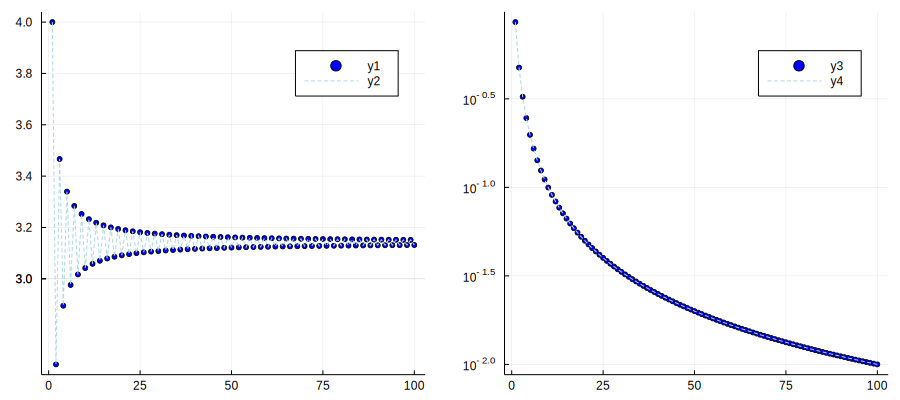

In [39]:
n     = 100
N, PI = pi_atan_todos(n)
E     = abs.(PI .- pi)

p = scatter(N, PI, c=:blue, ms=3, layout=(1,2), size=(900,400))
plot!(p[1], N, PI, c=:lightblue, l=:dash)
scatter!(p[2], N, E, c=:blue, ms=3, yaxis=:log)
plot!(p[2], N, E, c=:lightblue, l=:dash)

In [65]:
setprecision(2^12)
ceil(Int, -log10(eps(BigFloat)))

1233

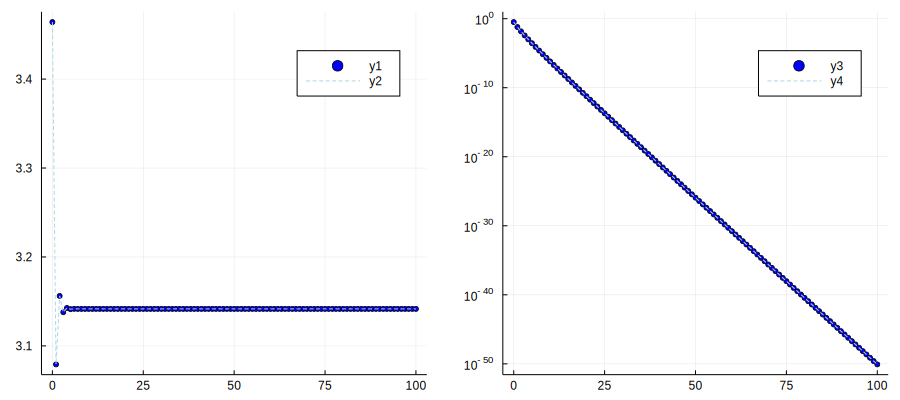

In [71]:
n     = 100
N, PI = pi_ml_todos(n)
E     = max.(abs.(PI .- pi), eps(BigFloat)^1.1)

p = scatter(N, PI, c=:blue, ms=3, layout=(1,2), size=(900,400))
plot!(p[1], N, PI, c=:lightblue, l=:dash)
scatter!(p[2], N, E, c=:blue, ms=3, yaxis=:log)
plot!(p[2], N, E, c=:lightblue, l=:dash)

$$ \frac{2}{\pi} = \frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2+\sqrt{2}}}{2} \cdot \frac{\sqrt{2+\sqrt{2+\sqrt{2}}}}{2} \cdot \cdots $$

In [104]:
"""
    pi_viete(n)

πₙ = 2 / aₙ
aₙ = t₁ × t₂ × t₃ × ⋯ × tₙ

t₁ = √2 / 2
t₂ = √(2 + √2)) / 2

r₁ = √2
r₂ = √(2 + r₁)
r₃ = √(2 + r₂)
rₙ = √(2 + rₙ₋₁)

tₙ = rₙ / 2

aₙ = aₙ₋₁ × rₙ / 2
"""
function pi_viete(n)
    a = big"1"
    r = sqrt(big"2")
    for k = 1:n
        a = a * r / 2
        r = sqrt(2 + r)
    end
    return 2 / a
end

function pi_viete()
    a = big"1"
    r = sqrt(big"2")
    k = 1
    while a * r / 2 != a
        a = a * r / 2
        r = sqrt(2 + r)
        k += 1
    end
    return 2 / a, k
end

function pi_viete_todos(n)
    PI = zeros(BigFloat, n)
    a = big"1"
    r = sqrt(big"2")
    for k = 1:n
        a = a * r / 2
        r = sqrt(2 + r)
        PI[k] = 2 / a
    end
    return 1:n, PI
end

pi_viete_todos (generic function with 1 method)

In [96]:
pi_viete(100) - π

-8.0396888954623093302081874892971708893673508976199825706838663131492122882437307096640205574928340245700758239967347020621403305886190281410789769355244433075761279666756845348900253455227970387381497882505906296259326150453491253059427100475555090977033622140697658591304497159689899566523086167283018253670315449195845317871691104242156548730555610151807813466304238301705967672384578275907142679428452521345854904324914209358585254410967156874684276414938558844857006864361441627273865901897991856702674424791267508666458753182688541741423932910839435406736788573903086869923793943777911954877959600123764603631296280193395070169695111585543850580876524206572492054147748340898222776633708810175148491985730528572532112940825503637961818814627252406935003987881766820610138253230988550544072383809216796696640199790929689083969450849850550101975808460827182393413562232921861767651038984494202624136995453897473395662967448059928693526742651785480845399716306544794507970124631878717219814595215

In [98]:
pie, k = pi_viete()
ceil(Int, -log10(pie - pi)), k

(1231, 2049)

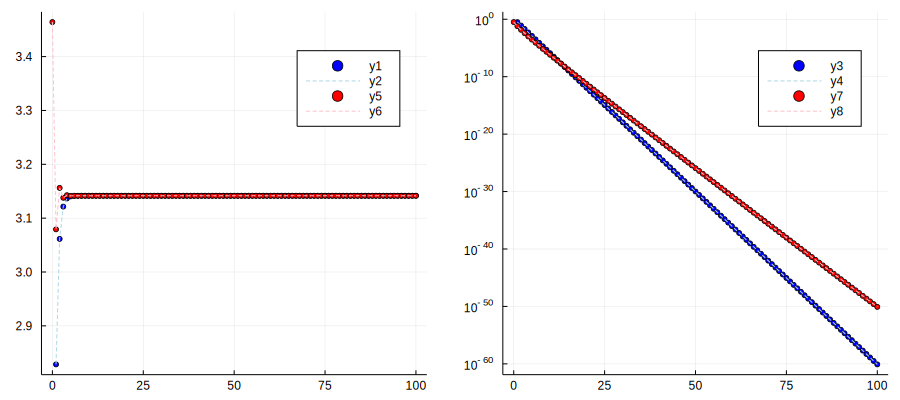

In [94]:
n     = 100
N, PI = pi_viete_todos(n)
E     = max.(abs.(PI .- pi), eps(BigFloat)^1.1)

p = scatter(N, PI, c=:blue, ms=3, layout=(1,2), size=(900,400))
plot!(p[1], N, PI, c=:lightblue, l=:dash)
scatter!(p[2], N, E, c=:blue, ms=3, yaxis=:log)
plot!(p[2], N, E, c=:lightblue, l=:dash)

N, PI = pi_ml_todos(n)
E     = max.(abs.(PI .- pi), eps(BigFloat)^1.1)

scatter!(p[1], N, PI, c=:red, ms=3)
plot!(p[1], N, PI, c=:pink, l=:dash)
scatter!(p[2], N, E, c=:red, ms=3, yaxis=:log)
plot!(p[2], N, E, c=:pink, l=:dash)

$$ \frac{\pi}{2} = \sum_{n=0} \frac{n!}{(2n+1)!!} = 1 + \frac{1}{3} + \frac{2\times1}{5\times3} + \frac{3\times2\times1}{7\times5\times3} + \dots + \frac{n\times(n-1)!}{(2n+1)\times(2n-1)!!} + \dots $$

In [109]:
"""
    pi_newton(n)

πₙ = 1 + 1/3 + 2 / (5*3) + 3! / (7*5*3) + … + n! / (2n+1)!!

tₙ = n! / (2n + 1)!!
   = tₙ₋₁ × n / (2n + 1)
"""
function pi_newton(n)
    s = big"0"
    t = big"1"
    for k = 1:n
        s += t
        t = t * k / (2k + 1)
    end
    return 2s
end

function pi_newton()
    s = big"0"
    t = big"1"
    k = 1
    while s + t != s
        s += t
        t = t * k / (2k + 1)
        k += 1
    end
    return 2s, k
end

function pi_newton_todos(n)
    PI = zeros(BigFloat, n)
    s = big"0"
    t = big"1"
    for k = 1:n
        s += t
        t = t * k / (2k + 1)
        PI[k] = 2s
    end
    return 1:n, PI
end

pi_newton_todos (generic function with 1 method)

In [110]:
pi_newton(100)

3.14159265358979323846264338327922563632122982655563278639702528399340169594125418150495542520104778417424615400616112817621897040351426460427171718776710165219620031124497153772466088405197137102281292902668832119493476376821848907170808658028975896034601753174431712778009410948187486222705513581449018809377807623531289961485067510250268787426343675828862292576792848392181047247560239789513256338845281656412327560027938941006672114355805844891948171091910158886029130904675608844015431911586787182891461684026868872459840608371070845382166895696887052413367396164023740789313308236450173874933599616572573296005815885138218148469969147103610071451235501793552525323299868981058498626827604759068512403298933234004230473382252047326162606464255517510731740973085428459396108013443914957891435031757512361328453973002520382290431893177992382234675336040335543138055824171574918445183777709809098208578142985697074442332577842505853808259444717572394861768689103399229960886000162186374485341003969

In [114]:
pie, k = pi_newton()
ceil(Int, -log10(abs(pie - pi))), k

(1232, 4091)

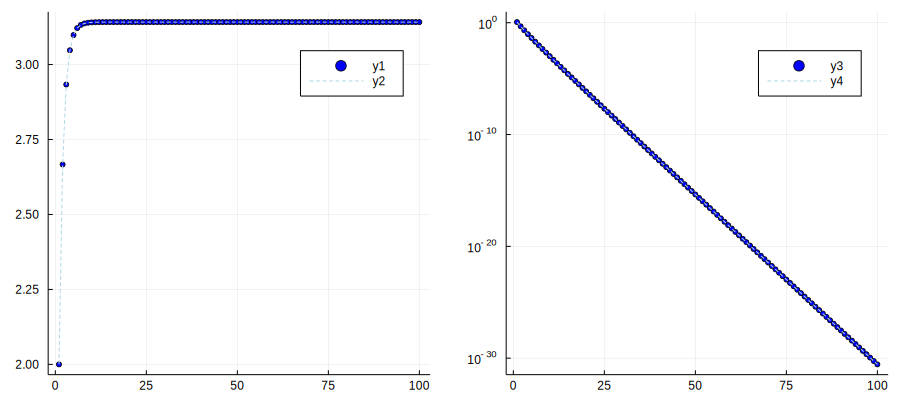

In [108]:
n     = 100
N, PI = pi_newton_todos(n)
E     = max.(abs.(PI .- pi), eps(BigFloat)^1.1)

p = scatter(N, PI, c=:blue, ms=3, layout=(1,2), size=(900,400))
plot!(p[1], N, PI, c=:lightblue, l=:dash)
scatter!(p[2], N, E, c=:blue, ms=3, yaxis=:log)
plot!(p[2], N, E, c=:lightblue, l=:dash)

In [124]:
function plota_pi(formulas, n)
    colors = [:blue, :red, :magenta, :cyan, :green]
    p = plot(layout=(1,2), size=(900,400), leg=:bottomright)
    for (i,form) in enumerate(formulas)
        N, PI = form(n)
        E     = max.(abs.(PI .- pi), eps(BigFloat)^1.1)

        c = colors[i]
        scatter!(p[1], N, PI, c=c, ms=3, lab="$form")
        plot!(p[1], N, PI, c=c, l=:dash, lab="")
        scatter!(p[2], N, E, c=c, ms=3, yaxis=:log, lab="$form", leg=false)
        plot!(p[2], N, E, c=c, l=:dash, lab="")
    end
    p
end

plota_pi (generic function with 1 method)

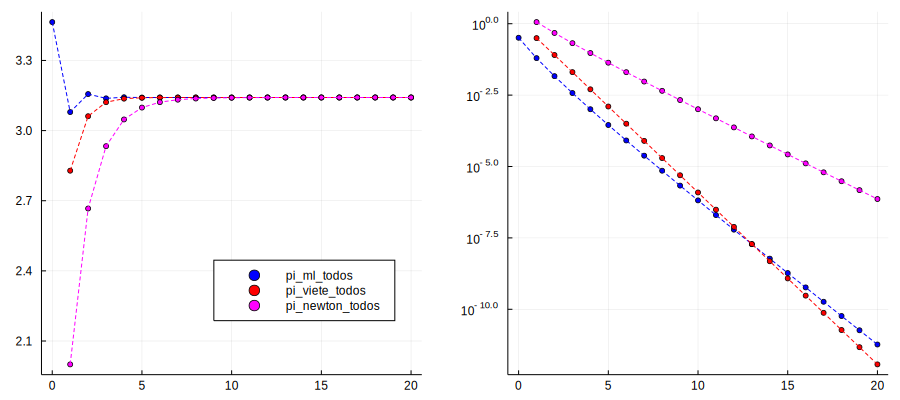

In [125]:
plota_pi([pi_ml_todos, pi_viete_todos, pi_newton_todos], 20)

$$ y_0 = \sqrt{2} - 1, \quad a_0 = 6 - 4\sqrt{2} $$
$$ y_{k+1} = (1 - f(y_k)) / (1 + f(y_k)), \quad a_{k+1} = a_k (1 + y_{k+1})^4 - 2^{2k+3}y_{k+1} (1 + y_{k+1} + y_{k+1}^2) $$
$$ f(y) = (1 - y^4)^{1/4} $$
$$ \pi = \lim_{k \to \infty} \frac{1}{a_k} $$

In [171]:
"""
    pi_borwein(n)

"""
function pi_borwein(n)
    y = sqrt(big"2") - 1
    a = 6 - 4*sqrt(big"2")
    f(y) = sqrt(sqrt(1 - y^4))
    for k = 0:n-1
        fy = f(y)
        y = (1 - fy) / (1 + fy)
        a = a * (1 + y)^4 - 2^(2k+3) * y * (1 + y + y^2)
    end
    return 1 / a
end

function pi_borwein()
    y = sqrt(big"2") - 1
    a = 6 - 4*sqrt(big"2")
    f(y) = sqrt(sqrt(1 - y^4))
    done = false
    k = 0
    while !done
        fy = f(y)
        y = (1 - fy) / (1 + fy)
        a⁺ = a * (1 + y)^4 - 2^(2k+3) * y * (1 + y + y^2)
        done = (a⁺ == a)
        a = a⁺
        k += 1
    end
    return 1 / a, k
end

function pi_borwein_todos(n)
    PI = zeros(BigFloat, n + 1)
    y = sqrt(big"2") - 1
    a = 6 - 4*sqrt(big"2")
    PI[1] = a
    f(y) = sqrt(sqrt(1 - y^4))
    for k = 0:n-1
        fy = f(y)
        y = (1 - fy) / (1 + fy)
        a = a * (1 + y)^4 - 2^(2k+3) * y * (1 + y + y^2)
        PI[k+2] = 1 / a
    end
    return 0:n, PI
end

pi_borwein_todos (generic function with 1 method)

In [176]:
floor(Int, -log10(abs(pi_borwein(6) - pi)))

1229

In [185]:
setprecision(2^21)
pie, k = pi_borwein()
floor(Int, -log10(abs(pie - pi))), k

(631302, 10)